# Import Module

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [561]:
data = pd.read_csv("Iris.csv")

In [563]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [565]:
data.shape

(150, 6)

In [567]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [569]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [571]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [573]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [575]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [577]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encoding Data

In [580]:
le = LabelEncoder()

In [582]:
data["Species"] = le.fit_transform(data["Species"])
data["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Features Scaling

In [518]:
features = data[data.columns[1:5]]

In [520]:
from sklearn.preprocessing import MinMaxScaler

In [522]:
sc = MinMaxScaler()

In [524]:
x = sc.fit_transform(features)

In [526]:
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [585]:
y = data["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [630]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Spliting train and test Data

In [633]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [635]:
x_train.shape ,x_test.shape

((105, 4), (45, 4))

In [637]:
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 105 rows
Test Set: 45 rows


# Logistic Regression

In [640]:
model = LogisticRegression()

In [642]:
model.fit(x_train,y_train)

LogisticRegression()

In [644]:
print("Logistic Regression Score :- " ,model.score(x_test,y_test)*100)

Logistic Regression Score :-  97.77777777777777


In [648]:
model.predict([[5.9,3.0,5.1,1.8]])

C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

# Data visualization

<Figure size 640x480 with 0 Axes>

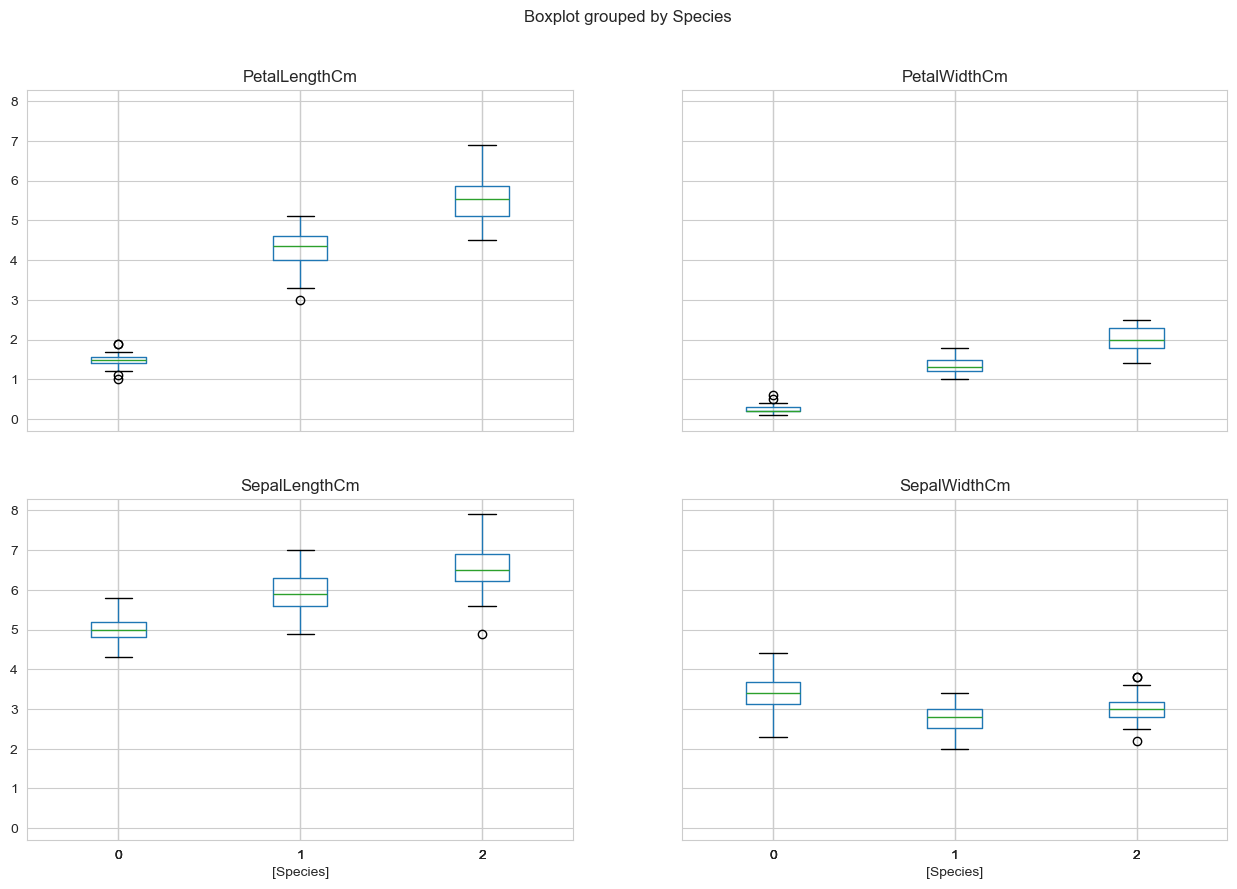

In [650]:
plt.figure()
data.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

# K-Nearest Neighbor(KNN)

In [652]:
model=KNeighborsClassifier(n_neighbors=13)

In [653]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [654]:
model.predict([[5.1,3.5,1.4,0.2]])



C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Calculating Model Accuracy Score

In [660]:
accuracy = accuracy_score(y_test, y_pred)*100

# accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 1)) + ' %.')

Accuracy of our model is equal 46.7 %.


# Using cross-validation for parameter tuning

In [664]:
knn_list = list(range(1,50,2))

In [666]:
knn_list

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

# Cross Valadition score

In [669]:
cv_scores = []

for k in knn_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [670]:
scores

array([0.86666667, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [671]:
cv_scores

[0.96,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666666,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001]

In [672]:
# changing to misclassification error
MSE = [round(1 - x, 3) for x in cv_scores]
print(MSE)

[0.04, 0.033, 0.033, 0.033, 0.027, 0.033, 0.02, 0.027, 0.027, 0.027, 0.033, 0.027, 0.033, 0.033, 0.047, 0.053, 0.053, 0.053, 0.053, 0.047, 0.047, 0.053, 0.067, 0.067, 0.06]


<Figure size 640x480 with 0 Axes>

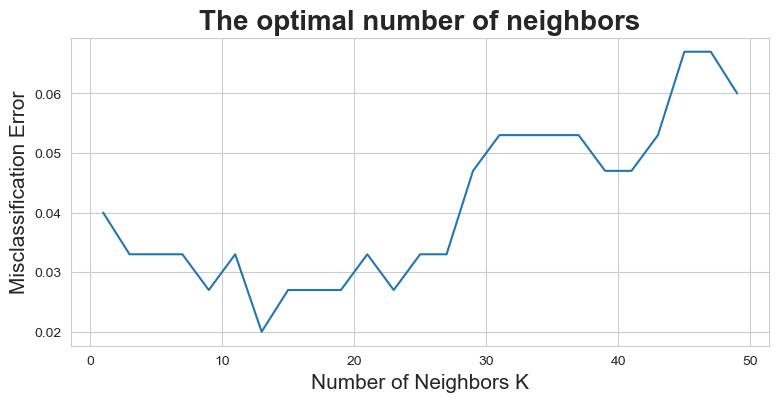

In [673]:
plt.figure()
plt.figure(figsize=(9,4))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(knn_list, MSE)

plt.show()

# finding best k

In [679]:
best_k = knn_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


In [682]:
y_pred = model.predict(x_test)

In [684]:
import joblib

joblib.dump(model, r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\knn_iris.pkl")

['C:\\\\Users\\\\Anish Avasthi\\\\Desktop\\\\Sunstone\\\\knn_iris.pkl']

In [686]:
load_model =  joblib.load(r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\knn_iris.pkl")

In [692]:
print("Enter Some Details")

sepal_length=float(input("Enter the sepal_length"))
sepal_width=float(input("Enter the sepal_width"))
petal_length=float(input("Enter the petal_length"))
petal_width=float(input("Enter the petal_width"))


x_new = np.array([[sepal_length,sepal_width,petal_length,petal_width]])
prediction = load_model.predict(x_new)

 
decode_dict = {0:"Iris-Setosa", 2:"Iris-Virginica", 1:"Iris-Versicolor"}

predicted_name = decode_dict[prediction[0]]
print("predicted Value :- ",predicted_name)


    

Enter Some Details


Enter the sepal_length 5.9
Enter the sepal_width 3
Enter the petal_length 5
Enter the petal_width 1.9


predicted Value Iris-Virginica


C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [342]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
